Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston


In [2]:
boston=load_boston()
data=pd.DataFrame(boston.data)

In [3]:
data.columns=boston.feature_names

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
data.RAD.value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [31]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [9]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [10]:
data['Price']=boston.target
data.shape

(506, 14)

### Data Analysis

CRIM from data.describe() shows possibility of outliers. So checking the distribution of data for that column.

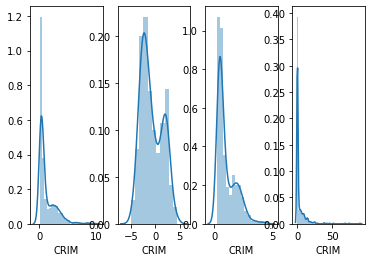

In [26]:

fig, axs = plt.subplots(ncols=4)
sns.distplot(data['CRIM'])
sns.distplot(data['CRIM'].apply(np.sqrt), ax=axs[0])
sns.distplot(data['CRIM'].apply(np.log), ax=axs[1])
sns.distplot(data['CRIM'].apply(np.cbrt), ax=axs[2])


In [28]:
data['CRIM']=data['CRIM'].apply(np.sqrt)

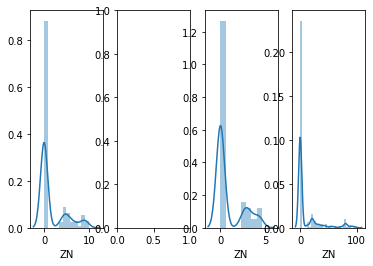

In [32]:
fig, axs = plt.subplots(ncols=4)
sns.distplot(data['ZN'])
sns.distplot(data['ZN'].apply(np.sqrt), ax=axs[0])
#sns.distplot(data['ZN'].apply(np.log), ax=axs[1])
sns.distplot(data['ZN'].apply(np.cbrt), ax=axs[2])


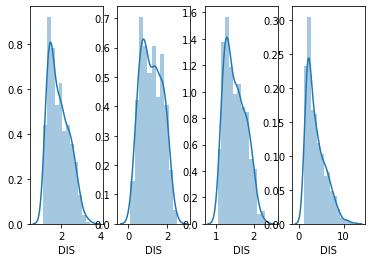

In [33]:
fig, axs = plt.subplots(ncols=4)
sns.distplot(data['DIS'])
sns.distplot(data['DIS'].apply(np.sqrt), ax=axs[0])
sns.distplot(data['DIS'].apply(np.log), ax=axs[1])
sns.distplot(data['DIS'].apply(np.cbrt), ax=axs[2])

In [34]:
data['DIS']=data['DIS'].apply(np.sqrt)

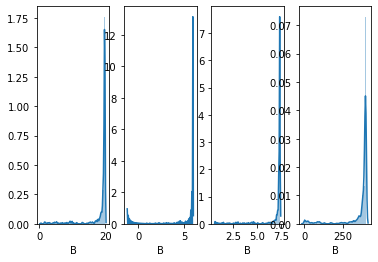

In [35]:
fig, axs = plt.subplots(ncols=4)
sns.distplot(data['B'])
sns.distplot(data['B'].apply(np.sqrt), ax=axs[0])
sns.distplot(data['B'].apply(np.log), ax=axs[1])
sns.distplot(data['B'].apply(np.cbrt), ax=axs[2])

In [37]:
data['B']=data['B'].apply(np.cbrt)

In [38]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.079498,18.0,2.31,0.0,0.538,6.575,65.2,2.022375,1.0,296.0,15.3,7.348979,4.98,24.0
1,0.165257,0.0,7.07,0.0,0.469,6.421,78.9,2.228699,2.0,242.0,17.8,7.348979,9.14,21.6
2,0.165197,0.0,7.07,0.0,0.469,7.185,61.1,2.228699,2.0,242.0,17.8,7.323773,4.03,34.7
3,0.179917,0.0,2.18,0.0,0.458,6.998,45.8,2.462154,3.0,222.0,18.7,7.334942,2.94,33.4
4,0.262774,0.0,2.18,0.0,0.458,7.147,54.2,2.462154,3.0,222.0,18.7,7.348979,5.33,36.2


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [40]:
X=data.iloc[:,:-1]
y=data.iloc[:,1]

In [41]:
X.shape

(506, 13)

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [44]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_predict=model.predict(X_test)

In [48]:
print(r2_score(y_test,y_predict))

1.0


In [51]:
print(mean_squared_error(y_test,y_predict))

6.175470528447124e-27


In [54]:
from ml_metrics import rmse

In [55]:
print(rmse(y_test,y_predict))

7.858416207129222e-14
